In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

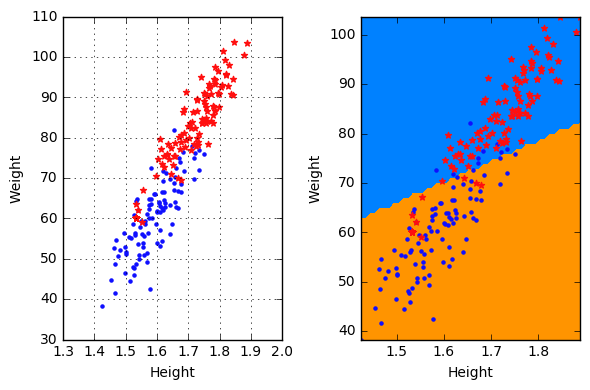

In [8]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx
    mse, w = least_squares(y, tx)
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [9]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return np.exp(t)/(1+np.exp(t))

In [23]:
sigmoid(np.array([2.7, 3, 4, 8]).T).shape

(4,)

In [20]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    affine_term = -np.dot(y.T,np.dot(tx,w))
    log_term = np.log(np.ones((y.shape[0],1)) + np.exp(np.dot(tx,w))).sum()
    return log_term + affine_term

In [24]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return np.dot(tx.T, sigmoid(np.dot(tx,w))-y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [25]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    g = calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma*g
    return loss, w

Demo!

Current iteration=0, the loss=[[ 138.62943611]]
Current iteration=1000, the loss=[[ 43.49258275]]
Current iteration=2000, the loss=[[ 41.55453652]]
Current iteration=3000, the loss=[[ 41.10170781]]
Current iteration=4000, the loss=[[ 40.96605044]]
Current iteration=5000, the loss=[[ 40.92056156]]
Current iteration=6000, the loss=[[ 40.90438018]]
Current iteration=7000, the loss=[[ 40.89842938]]
Current iteration=8000, the loss=[[ 40.89619782]]
Current iteration=9000, the loss=[[ 40.89535113]]
The loss=[[ 40.89502758]]


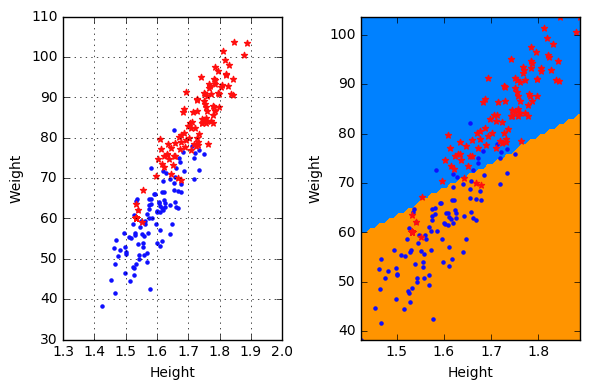

In [26]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [54]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    S = np.diag((sigmoid(np.dot(tx,w))*(1-sigmoid(np.dot(tx,w)))).flatten())
    return np.dot(np.dot(tx.T,S),tx)

Write a function below to return loss, gradient, and hessian.

In [55]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    return (calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w))

### Using Newton method
Use Newton method for logistic regression.

In [58]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, g, h = logistic_regression(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma*np.dot(np.linalg.inv(h),g)
    return loss, w

demo

Current iteration=0, the loss=[[ 138.62943611]]
Current iteration=500, the loss=[[ 40.96438279]]
Current iteration=1000, the loss=[[ 40.89482895]]
The loss=[[ 40.89482609]]


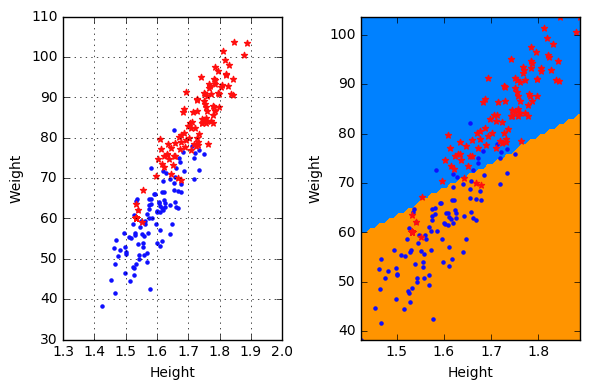

In [59]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [69]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w) + lambda_*np.dot(w.T,w)
    g = calculate_gradient(y, tx, w) + 2*lambda_*w
    h = calculate_hessian(y, tx, w) + 2*lambda_*np.eye(w.shape[0])
    return (loss, g, h)

In [72]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, g, h = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma*np.dot(np.linalg.inv(h),g)
    return loss, w, g

Current iteration=0, the loss=[[ 138.62943611]], gn=[[ 11068.25069832]]
weights=[[ 0.00039761]
 [ 0.00514036]
 [-0.02053547]]
Current iteration=200, the loss=[[ 53.62187695]], gn=[[ 201.66802902]]
weights=[[ 0.08189563]
 [ 0.80973847]
 [-3.01983221]]
Current iteration=400, the loss=[[ 46.72204431]], gn=[[ 3.65433792]]
weights=[[ 0.14161243]
 [ 1.18686208]
 [-4.61352556]]
Current iteration=600, the loss=[[ 46.48246997]], gn=[[ 0.06572578]]
weights=[[ 0.15690519]
 [ 1.25682349]
 [-4.96989537]]
Current iteration=800, the loss=[[ 46.47759325]], gn=[[ 0.00118015]]
weights=[[ 0.15923294]
 [ 1.26662346]
 [-5.0223535 ]]
Current iteration=1000, the loss=[[ 46.47750413]], gn=[[  2.11851177e-05]]
weights=[[ 0.15955059]
 [ 1.26794408]
 [-5.02947615]]
The loss=[[ 42.43739711]]


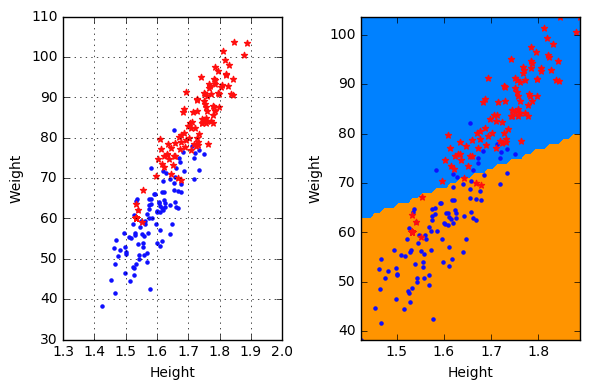

In [84]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.15
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w, g = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 200 == 0:
            print("Current iteration={i}, the loss={l}, gn={gn}".format(i=iter, l=loss, gn=np.dot(g.T,g)))
            print("weights={ws}".format(ws=w))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)